### Esquema de Estado con DataClasses
Cuando definimos un StateGraph de LangGraph, usamos un esquema de estado.

El esquema de estado representa la estructura y tipos de datos que nuestro grafo utilizará.

Se espera que todos los nodos se comuniquen con ese esquema.

¡LangGraph ofrece flexibilidad en cómo defines tu esquema de estado, acomodando varios tipos de Python y enfoques de validación!

Podemos usar la clase TypedDict del módulo typing de Python.

Te permite especificar claves y sus correspondientes tipos de valores.

Pero, ten en cuenta que estas son pistas de tipo (type hints).

Pueden ser usadas por verificadores de tipos estáticos (como mypy) o IDEs para detectar posibles errores relacionados con tipos antes de que se ejecute el código.

¡Pero no se aplican en tiempo de ejecución!

In [1]:
# Importamos TypedDict para definir diccionarios con tipos específicos
from typing_extensions import TypedDict
# Importamos Literal para definir valores literales específicos permitidos
from typing import Literal

# Definimos el esquema de estado usando TypedDict
class TypedDictState(TypedDict):
    # name: campo de tipo string que almacena el nombre
    name:str
    # game: campo que solo acepta los valores literales "cricket" o "badminton"
    game:Literal["cricket","badminton"]

    

In [2]:
# Definimos la función play_game que procesa el estado inicial
def play_game(state:TypedDictState):
    # Imprimimos mensaje indicando que el nodo ha sido llamado
    print("---Nodo Jugar ha sido llamado--")
    # Retornamos un diccionario actualizando el nombre con " quiere jugar "
    return {"name":state['name'] + " quiere jugar "}

# Definimos la función cricket para el juego de cricket
def cricket(state:TypedDictState):
    # Imprimimos mensaje indicando que el nodo cricket ha sido llamado
    print("-- Nodo Cricket ha sido llamado--")
    # Retornamos el nombre actualizado con " cricket" y establecemos game a "cricket"
    return {"name":state["name"] + " cricket","game":"cricket"}

# Definimos la función badminton para el juego de badminton
def badminton(state:TypedDictState):
    # Imprimimos mensaje indicando que el nodo badminton ha sido llamado
    print("-- Nodo Badminton ha sido llamado--")
    # Retornamos el nombre actualizado con " badminton" y establecemos game a "badminton"
    return {"name":state["name"] + " badminton","game":"badminton"}

In [3]:
# Importamos random para generar números aleatorios
import random
# Definimos la función decide_play que decide qué juego se jugará
def decide_play(state:TypedDictState)->Literal["cricket","badminton"]:
    # Aquí, hacemos una división 50/50 entre los nodos cricket y badminton
    # Generamos un número aleatorio entre 0 y 1
    if random.random() < 0.5:
        # Si el número es menor a 0.5, retornamos "cricket"
        return "cricket"
    else:
        # Si el número es mayor o igual a 0.5, retornamos "badminton"
        return "badminton"

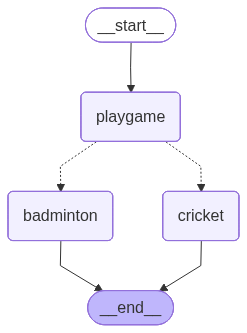

In [4]:
# Importamos Image y display para visualizar el grafo
from IPython.display import Image, display
# Importamos los componentes de LangGraph para construir el grafo
from langgraph.graph import StateGraph, START, END

# Creamos el constructor del grafo con el esquema TypedDictState
builder=StateGraph(TypedDictState)
# Agregamos el nodo "playgame" que ejecuta la función play_game
builder.add_node("playgame",play_game)
# Agregamos el nodo "cricket" que ejecuta la función cricket
builder.add_node("cricket",cricket)
# Agregamos el nodo "badminton" que ejecuta la función badminton
builder.add_node("badminton",badminton)

## Flujo del grafo

# Conectamos el nodo START al nodo "playgame" (primer nodo a ejecutar)
builder.add_edge(START,"playgame")
# Agregamos aristas condicionales desde "playgame" usando la función decide_play
# Esta función decide si se va a cricket o badminton
builder.add_conditional_edges("playgame",decide_play)
# Conectamos el nodo "cricket" al nodo END (finaliza el flujo)
builder.add_edge("cricket",END)
# Conectamos el nodo "badminton" al nodo END (finaliza el flujo)
builder.add_edge("badminton",END)

# Compilamos el grafo para poder ejecutarlo
graph = builder.compile()

# Visualizamos el grafo generado en formato Mermaid PNG
display(Image(graph.get_graph().draw_mermaid_png()))


In [5]:
# Invocamos el grafo con un diccionario que contiene el nombre "Krish"
# TypedDict permite pasar diccionarios directamente sin validación en tiempo de ejecución
graph.invoke({"name":"Krish"})

---Nodo Jugar ha sido llamado--
-- Nodo Cricket ha sido llamado--


{'name': 'Krish quiere jugar  cricket', 'game': 'cricket'}

In [ ]:
# Invocamos el grafo con un número en lugar de un string
# TypedDict NO valida el tipo al crear el diccionario (acepta {"name":123})
# Sin embargo, el error ocurre durante la ejecución cuando intentamos
# concatenar el int 123 con el string " quiere jugar " en la función play_game
# Esto causará un TypeError: unsupported operand type(s) for +: 'int' and 'str'
graph.invoke({"name":123})

In [ ]:
### Pydantic (Python)

### Dataclasses
Las dataclasses de Python proporcionan otra forma de definir datos estructurados.

Las dataclasses ofrecen una sintaxis concisa para crear clases que se usan principalmente para almacenar datos.

In [9]:
### DataClasses

# Importamos dataclass para crear clases de datos
from dataclasses import dataclass

# Usamos el decorador @dataclass para crear una clase de datos
@dataclass
class DataClassState:
    # name: atributo de tipo string que almacena el nombre
    name:str
    # game: atributo que solo acepta los valores literales "badminton" o "cricket"
    game:Literal["badminton","cricket"]

In [10]:
# Redefinimos la función play_game para trabajar con DataClassState
def play_game(state:DataClassState):
    # Imprimimos mensaje indicando que el nodo ha sido llamado
    print("---Nodo Jugar ha sido llamado--")
    # Accedemos al atributo name usando notación de punto (state.name)
    # en lugar de diccionario (state['name'])
    return {"name":state.name + " quiere jugar "}

# Redefinimos la función cricket para DataClassState
def cricket(state:DataClassState):
    # Imprimimos mensaje indicando que el nodo cricket ha sido llamado
    print("-- Nodo Cricket ha sido llamado--")
    # Usamos state.name para acceder al atributo de la dataclass
    return {"name":state.name + " cricket","game":"cricket"}

# Redefinimos la función badminton para DataClassState
def badminton(state:DataClassState):
    # Imprimimos mensaje indicando que el nodo badminton ha sido llamado
    print("-- Nodo Badminton ha sido llamado--")
    # Usamos state.name para acceder al atributo de la dataclass
    return {"name":state.name + " badminton","game":"badminton"}

In [11]:
# Importamos random para generar números aleatorios
import random
# Redefinimos decide_play para trabajar con DataClassState
def decide_play(state:DataClassState)->Literal["cricket","badminton"]:
    # Aquí, hacemos una división 50/50 entre los nodos cricket y badminton
    # Generamos un número aleatorio entre 0 y 1
    if random.random() < 0.5:
        # Si el número es menor a 0.5, retornamos "cricket"
        return "cricket"
    else:
        # Si el número es mayor o igual a 0.5, retornamos "badminton"
        return "badminton"

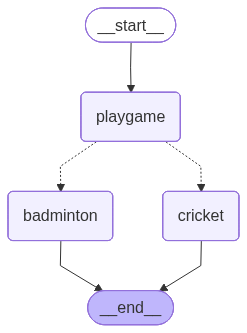

In [12]:
# Creamos el constructor del grafo con el esquema DataClassState
builder=StateGraph(DataClassState)
# Agregamos el nodo "playgame" que ejecuta la función play_game
builder.add_node("playgame",play_game)
# Agregamos el nodo "cricket" que ejecuta la función cricket
builder.add_node("cricket",cricket)
# Agregamos el nodo "badminton" que ejecuta la función badminton
builder.add_node("badminton",badminton)

## Flujo del grafo

# Conectamos el nodo START al nodo "playgame" (primer nodo a ejecutar)
builder.add_edge(START,"playgame")
# Agregamos aristas condicionales desde "playgame" usando la función decide_play
builder.add_conditional_edges("playgame",decide_play)
# Conectamos el nodo "cricket" al nodo END (finaliza el flujo)
builder.add_edge("cricket",END)
# Conectamos el nodo "badminton" al nodo END (finaliza el flujo)
builder.add_edge("badminton",END)

# Compilamos el grafo para poder ejecutarlo
graph = builder.compile()

# Visualizamos el grafo generado en formato Mermaid PNG
display(Image(graph.get_graph().draw_mermaid_png()))

In [37]:
# Invocamos el grafo pasando una instancia de DataClassState
# Con DataClass debemos crear una instancia usando el constructor de la clase
graph.invoke(DataClassState(name="Raul",game="cricket"))

---Nodo Jugar ha sido llamado--
-- Nodo Badminton ha sido llamado--


{'name': 'Raul quiere jugar  badminton', 'game': 'badminton'}

In [41]:
# Invocamos el grafo nuevamente con DataClassState
# Cada invocación puede resultar en diferentes caminos debido a la aleatoriedad
graph.invoke(DataClassState(name="Raul",game="cricket"))

---Nodo Jugar ha sido llamado--
-- Nodo Cricket ha sido llamado--


{'name': 'Raul quiere jugar  cricket', 'game': 'cricket'}

In [25]:
graph.invoke(DataClassState(name="Raul", game= ""))

---Nodo Jugar ha sido llamado--
-- Nodo Cricket ha sido llamado--


{'name': 'Raul quiere jugar  cricket', 'game': 'cricket'}